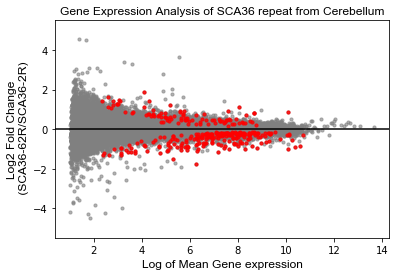

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt 
import matplotlib.font_manager
import matplotlib.lines as mlines
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# import deseq2 genes csv
path =  "pathtofile"
sca = pd.read_csv(path + "SCA_results.csv")

# seperate signficant genes into new DF
sigdiff = sca[sca["padj"]<=0.10]

# plot scatterplots of non-signficant genes and sigdiff genes on top of each other coloring sigdiff red
# set figsize 4 by 2.5 inches
# set font to Arial and fontsize to 12.
# need points to be visible in relation to Fontsize.
# make horizontal line at 0.

sns_plot= sns.regplot(x=np.log(sca["baseMean"] +1), y=sca["log2FoldChange"],fit_reg=False, color='grey', marker="o",scatter_kws={'alpha':0.6, "s":10})
sns_plot= sns.regplot(x=np.log(sigdiff["baseMean"] +1), y=sigdiff["log2FoldChange"],fit_reg=False, color='red', marker="o",scatter_kws={"s":10})
plt.ylabel("Log2 Fold Change\n (treament/control)", family='Arial', fontsize=12 )
plt.xlabel("Log of Mean Gene expression", family='Arial', fontsize=12 )
plt.title("Gene Expression Analysis of ExperimentName from organism_name", fontsize=12,family='Arial' )
plt.ylim(-5.5,5.5)
plt.rcParams["axes.labelsize"] = 12
plt.rcParams['figure.figsize'] = 10, 5
plt.axhline(y=0,color='black')
sns_plot.figure.savefig(path + "SCA_maplot.png")
plt.show()